# Subplots and Enumeration - Lab

## Introduction

In this lab, we'll get some practice creating **_subplots_**, and explore how we can use the `enumerate` keyword to make creating them a bit easier!

## Objectives

You will be able to:

* Use python's `enumerate` keyword for lists where we also to access the index
* Create basic subplots with matplotlib
* Use `enumerate` to write effective, pythonic code when creating subplots

## Getting Started

For this lab, we'll explore a dataset containing yearly population data about different countries and regions around the globe. Let's start by importing the dataset so we can get to work.

In the cell below: 

* Import pandas and set the standard alias of `pd`
* Import the `pyplot` module from `matplotlib` and set the standard alias of `plt`
* Set matplotlib visualizations to appear inline with the command `%matplotlib inline`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's import the dataset. 

In the cell below:

* Use pandas to read in the data stored in the file `population.csv`.
* Print the head of the dataframe to ensure everything loaded correctly and get a feel for what this dataset contains. 

In [2]:
df = pd.read_csv('population.csv')
df.head(), df.tail()

NameError: name 'pd' is not defined

Our columns look fairly standard. Let's take a look at the `value_counts()` of the `'Country Name'` column to get a feel for how many years there are per country. 

Do this now in the cell below. 

In [14]:
df['Country Name'].value_counts().head()

Central African Republic    57
Austria                     57
Maldives                    57
Comoros                     57
Malawi                      57
Name: Country Name, dtype: int64

## Groupings and Subplots

When creating subplots, it makes sense that we'll usually want the plots to contain data that is related to one another, so that the subplots will make it easy to visually compare and see trends or patterns. The easiest way to do this is to group our data by the types of information we're most interested in seeing. For this dataset, that means that we can group by `'Country Name'`, by `'Country Code'`, or by `'Year'`. Let's start by grouping by name.

For our first subplot, we'll create 1 row containing 2 subplots. Let's start by getting some data for each of our plots. We'll start by getting some data to plot.  We'll do this by slicing data for the USA and Canada and storing them in separate variables. 

In the cell below:

* Slice all the rows for '`United States`' and store them in the appropriate variable. 
* Slice all the rows for '`Canada`' and store them in the appropriate variable. 
* Inspect the `.head()` of each to ensure that we grabbed the data correctly. 

In [23]:
usa = df.loc[df['Country Name']=='United States']
canada = df.loc[df['Country Name']=='Canada']

Now that we have our data ready to go, lets go ahead and create a basic subplot. For our first batch of subplots, we'll use the quick way by making use of `plt.subplot()` and passing in the number of rows, number of columns, and the number of the subplot that we want to create. Then, we'll create our plot by passing in the corresponding data. 

When we call `plt.subplot()`, it will return an `ax` (short for 'axis') object that corresponds to the 3rd parameter we pass in--the actual plot we will want to create. To create subplots on the fly with this method, we'll:

1. Get the `ax` object for the first plot  in the subplot we want to create. Store this in the variable `ax1`.
2. Call `.plot()` on the `usa` DataFrame, and specify the following parameters:
    * `x='Year'`
    * `y='Value'`
    * `ax=ax1`
3. Use the `ax1` object's methods to do any labeling we find necessary.
4. Repeat the process for `canada` with the second plot. Store this axis in `ax2`.  

Do this now in the cell below. 

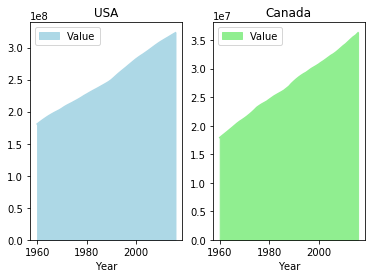

<Figure size 3600x7200 with 0 Axes>

In [71]:
#plt.figure(figsize = (11, 8)
ax1 = plt.subplot(1, 2, 1)
usa.plot(x='Year', y= 'Value', ax=ax1, kind = 'area', color='lightblue', 
         title='USA')


ax2 = plt.subplot(1, 2, 2)
canada.plot(x='Year', y='Value', ax = ax2, kind='area', color='lightgreen', 
           title = "Canada")

plt.figure(figsize = (50, 100))
plt.subplots_adjust(wspace=0.8)
plt.show()

Our plots look pretty good, but they're a bit squished together, and the plots themselves are much too small, which squishes the axis values.  Both of these problems have an easy fix. We'll begin by using `plt.figure()` and passing in a larger `figsize` of `(20, 10)` to tell matplotlib we want the full subplot to be 20 inches by 10.  

We can fix the spacing quite easily by using `plt.subplots_adjust()` and changing the amount of space in between our plots. The [documentation for `subplots_adjust`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) tells us that the parameter we need to adjust is `wspace`. This is set to `0.2` by default, meaning that the amount of space between our plots is equal to 20% of the width of the plots. Let's set `wspace=0.4`, and see how that looks.

In the cell below: 

* Call `plt.figure()` and use the `figsize` parameter to set the size of the total subplot to 20 inches wide by 10 inches tall. Remember to pass these values in as a tuple, with width first and height second. 
* Copy the visualization code from the cell above into the cell below. 
* After setting the title for the Canada plot, add the line `plt.subplots_adjust()` and pass in the parameter `wspace=0.4`.

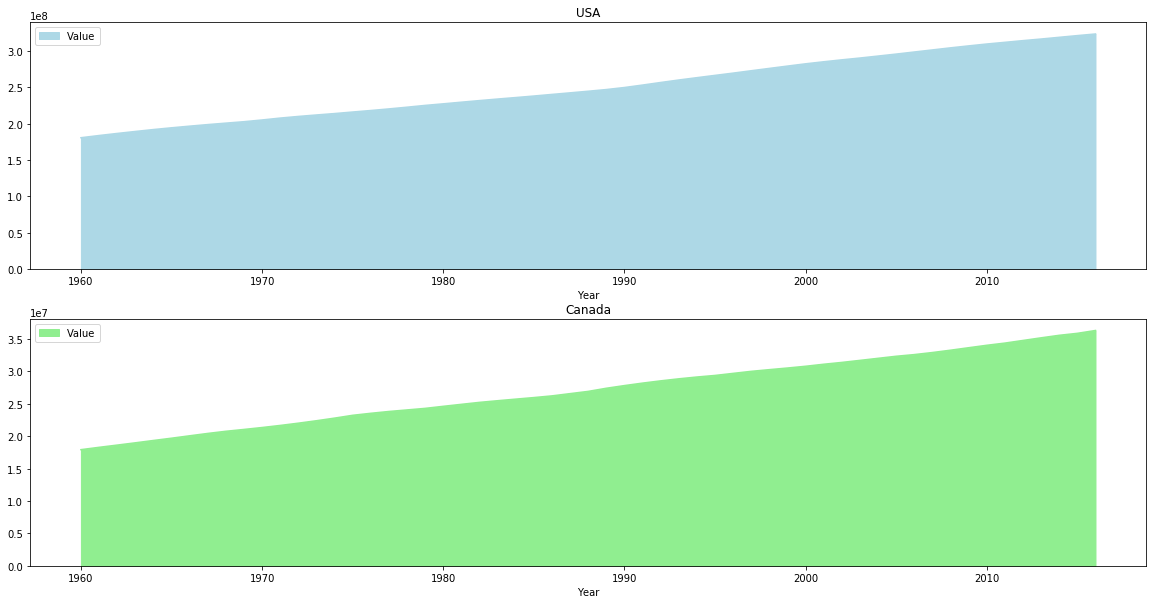

In [75]:
plt.figure(figsize = (20, 10))

ax1 = plt.subplot(2, 1, 1)
usa.plot(x='Year', y= 'Value', ax=ax1, kind = 'area', color='lightblue', 
         title='USA')


ax2 = plt.subplot(2, 1, 2)
canada.plot(x='Year', y='Value', ax = ax2, kind='area', color='lightgreen', 
           title = "Canada")


plt.subplots_adjust(wspace=0.4)
plt.show()

Much better!

Next, we'll see some advanced methods for creating subplots. But, before we do that, let's take a brief detour and learn about the `enumerate` keyword!

## Using `enumerate()`

Python's `enumerate()` keyword is a special type of for loop. It works just like a regular for-loop, with 1 major difference--instead of just returning the next object with each iteration of the loop, it also returns the index of the object from the collection we're looping through! 

Run the example code in the cell below, and examine the output. That should make it clear what is happening. 

In [46]:
sample_list = ['foo', 'bar', 'baz']

for index, value in enumerate(sample_list):
    print("Index: {}      Value: {}".format(index, value))    

Index: 0      Value: foo
Index: 1      Value: bar
Index: 2      Value: baz


The `enumerate` keywor is extremely helpful anytime we need to do something that needs the index of the item we're looping through. Let's try an example.

In the cell below: 
* `enumerate()` through `sample_list_2` in the cell below
* For any item in `sample_list_2`, append it to the `odds` list if it's index is an odd number. 
* Once the loop has finished, print `odds`.

In [53]:
sample_list_2 = ['item at Index ' + str(i) for i in range(10)]
odds = []

# Write your code below this line
for index,value in enumerate(sample_list_2):
    if index%2>0:
        odds.append(value)
    else: next 
    
#print(odds)


# Write your code above this line

odds
# Expected Output: 
# ['item at Index 1',
#  'item at Index 3',
#  'item at Index 5',
#  'item at Index 7',
#  'item at Index 9']

['item at Index 1',
 'item at Index 3',
 'item at Index 5',
 'item at Index 7',
 'item at Index 9']

Great! There are plenty of situations where `enumerate()` comes in very handy. By allowing us to get the index and the value at the same time, it makes it simple to do something to something with one based on the value of the other. This is a natural requirement of subplots.

## Enumerating with Subplots

To end this lab, we'll see how we can use `enumerate` to easily subplot this entire dataframe by country--all 263 of them!

It will work like this. We'll begin by grouping each row in our DataFrame by `'Country Name'`. Then, we'll create a `plt.figure()` and set the figure size to `(20,40)`. We'll also set the `facecolor` to `'white'`, so that it's a bit easier to read. 

Then comes the fun part. We'll enumerate through our grouped DataFrame. Just looping through a grouped DataFrame returns a tuple containing the index and the rows with that country name. Since we're grouped by `"Country Name"`, this means that the index will actually be the `'Country Name'`. However, we're not just looping through the grouped DataFrame--we're `enumerate`-ing through it! 

```python
for index, (value1, value2) in enumerate(grouped_DataFrame):
    # index is an integer, starting at 0 and counting up by 1 just 
    # like we would expect a for loop to do
    
    #(value1, value2) is a tuple containing the name of the country as value 1
    # (since it is acting as the index because we grouped everything by it),
    # and value 2 is all the rows that belong to that country's group. 
    
```

This means that the `index` for our enumeration will be an integer value that counts higher by 1 with each country. If we just add 1 to it (because subplots start counting at 1, but python starts counting at 0), then this number will correspond with the index we need to pass in as the third parameter in `plt.subplot()`--the parameter that specifies which plot inside the subplot should show the plot we're about to create. 

Don't worry if this seems confusing--the code below has been commented to help you. 

In [67]:
grouped_df = df.groupby('Country Name')
grouped_df.describe()

Value                                            \
                         count          mean           std           min   
Country Name                                                               
Afghanistan               57.0  1.704045e+07  7.535617e+06  8.996351e+06   
Albania                   57.0  2.700067e+06  4.914336e+05  1.608800e+06   
Algeria                   57.0  2.453749e+07  8.954652e+06  1.112489e+07   
American Samoa            57.0  4.221081e+04  1.367339e+04  2.001300e+04   
Andorra                   57.0  5.020537e+04  2.338180e+04  1.341100e+04   
Angola                    57.0  1.329235e+07  6.696073e+06  5.643182e+06   
Antigua and Barbuda       57.0  7.576537e+04  1.246031e+04  5.533900e+04   
Arab World                57.0  2.224961e+08  9.443191e+07  9.249093e+07   
Argentina                 57.0  3.185273e+07  7.069701e+06  2.061908e+07   
Armenia                   57.0  2.909755e+06  4.186469e+05  1.874120e+06   
Aruba                     57.0  7.471237e+04  1.848059e+04  5.421100e+04   
Australia                 57.0  1.668664e+07  3.904297e+06  1.027648e+07   
Austria                   57.0  7.792513e+06  4.194833e+05  7.047539e+06   
Azerbaijan                57.0  6.904155e+06  1.643482e+06  3.895396e+06   
Bahamas, The              57.0  2.495159e+05  8.010309e+04  1.095280e+05   
Bahrain                   57.0  5.693123e+05  3.779457e+05  1.624270e+05   
Bangladesh                57.0  1.032446e+08  3.630465e+07  4.819975e+07   
Barbados                  57.0  2.581709e+05  1.620627e+04  2.309390e+05   
Belarus                   57.0  9.534428e+06  5.527051e+05  8.198000e+06   
Belgium                   57.0  1.007900e+07  5.433487e+05  9.153489e+06   
Belize                    57.0  1.982045e+05  8.149393e+04  9.206400e+04   
Benin                     57.0  5.404569e+06  2.539713e+06  2.431622e+06   
Bermuda                   57.0  5.771563e+04  5.675732e+03  4.440000e+04   
Bhutan                    57.0  4.870956e+05  1.699456e+05  2.232880e+05   
Bolivia                   57.0  6.840732e+06  2.185434e+06  3.693449e+06   
Bosnia and Herzegovina    57.0  3.879439e+06  3.252043e+05  3.225668e+06   
Botswana                  57.0  1.309982e+06  5.400481e+05  5.245520e+05   
Brazil                    57.0  1.423253e+08  4.213535e+07  7.220755e+07   
British Virgin Islands    57.0  1.650596e+04  6.998289e+03  8.033000e+03   
Brunei Darussalam         57.0  2.490019e+05  1.069558e+05  8.174500e+04   
...                        ...           ...           ...           ...   
Syrian Arab Republic      57.0  1.221373e+07  5.359420e+06  4.573512e+06   
Tajikistan                57.0  5.008259e+06  1.934185e+06  2.087038e+06   
Tanzania                  57.0  2.682752e+07  1.316530e+07  1.007451e+07   
Thailand                  57.0  5.208576e+07  1.311501e+07  2.739718e+07   
Timor-Leste               57.0  7.889950e+05  2.198272e+05  4.999500e+05   
Togo                      57.0  3.884008e+06  1.795143e+06  1.580513e+06   
Tonga                     57.0  9.221307e+04  1.096397e+04  6.160100e+04   
Trinidad and Tobago       57.0  1.149063e+06  1.610018e+05  8.484790e+05   
Tunisia                   57.0  7.741884e+06  2.334297e+06  4.176266e+06   
Turkey                    57.0  5.203820e+07  1.551289e+07  2.747233e+07   
Turkmenistan              57.0  3.543834e+06  1.222412e+06  1.603258e+06   
Turks and Caicos Islands  57.0  1.481442e+04  9.870763e+03  5.559000e+03   
Tuvalu                    57.0  8.702070e+03  1.365315e+03  6.104000e+03   
Uganda                    57.0  1.894579e+07  9.988692e+06  6.788214e+06   
Ukraine                   57.0  4.820796e+07  2.616034e+06  4.266215e+07   
United Arab Emirates      57.0  2.723791e+06  2.898427e+06  9.263400e+04   
United Kingdom            57.0  5.789489e+07  3.173437e+06  5.240000e+07   
United States             57.0  2.499603e+08  4.276697e+07  1.806710e+08   
Upper middle income       57.0  1.931361e+09  4.384720e+08  1.169383e+09 

AttributeError: 'tuple' object has no attribute 'plot'

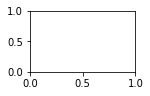

In [81]:
plt.figure(figsize = (20, 40), facecolor='white')
for country, value in enumerate(grouped_df):
    ax = plt.subplot(30, 9, index+1)
    df.plot(x = 'Year', y = 'Value', ax = ax, legend=False)
    ax.set_title(country)

In [ ]:
# Group the DataFrame by Country Name--this line has been provided for you
grouped_df = df.groupby('Country Name')

# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=None, facecolor=None)

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for None, None in enumerate(grouped_df):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(30, 9, None)
    
    # Complete the line to create the plot for this subplot. 
    # Same visualizations as we created above!
    population.plot(x=None, y=None, ax=None, legend=False)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(None)


Great job! Being able to effectively create subplots with matplotlib is a solid data visualization skill to have--and using `enumerate()` makes our code that much simpler!

## Summary

In this lab, we learned how to create advanced subplots using `enumerate()` on grouped DataFrames!